<a href="https://colab.research.google.com/github/nganchufinance/nganchufinance/blob/main/Copy_of_Data_Analysis_Electricity_official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation
#Data
#https://aemo.com.au/en/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

In [1]:
# Step 1: Import the required libraries
import pandas as pd
from google.colab import files
#Graphical Package
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Step 2: Upload the CSV file
uploaded = files.upload()

Saving PRICE_AND_DEMAND_202406_QLD1.csv to PRICE_AND_DEMAND_202406_QLD1.csv


In [4]:
# Step 3: Read the CSV file into a pandas DataFrame
# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

In [6]:
# Display the first few rows of the DataFrame
print(df.head())

  REGION       SETTLEMENTDATE  TOTALDEMAND     RRP PERIODTYPE
0   QLD1  2024/06/01 00:05:00      5904.09  173.01      TRADE
1   QLD1  2024/06/01 00:10:00      5890.41  148.26      TRADE
2   QLD1  2024/06/01 00:15:00      5886.49  155.77      TRADE
3   QLD1  2024/06/01 00:20:00      5850.15  159.50      TRADE
4   QLD1  2024/06/01 00:25:00      5820.65  173.00      TRADE


kiểu dữ liệu có kiểu 1 object - chữ, 2 float 64 mới cộng trừ được

In [7]:
print(df.dtypes)#kiểu dữ liệu có kiểu 1 object - chữ, 2 float 64 mới cộng trừ được

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object


summary

In [8]:
# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

# Display data info
#print(df.info())



  REGION       SETTLEMENTDATE  TOTALDEMAND     RRP PERIODTYPE
0   QLD1  2024/06/01 00:05:00      5904.09  173.01      TRADE
1   QLD1  2024/06/01 00:10:00      5890.41  148.26      TRADE
2   QLD1  2024/06/01 00:15:00      5886.49  155.77      TRADE
3   QLD1  2024/06/01 00:20:00      5850.15  159.50      TRADE
4   QLD1  2024/06/01 00:25:00      5820.65  173.00      TRADE
       TOTALDEMAND          RRP
count  8640.000000  8640.000000
mean   6094.445219   124.667442
std    1021.611323   109.966620
min    3708.210000   -47.740000
25%    5497.617500    50.567500
50%    5979.900000   100.900000
75%    6891.757500   196.940000
max    8567.600000   760.260000


show histogram

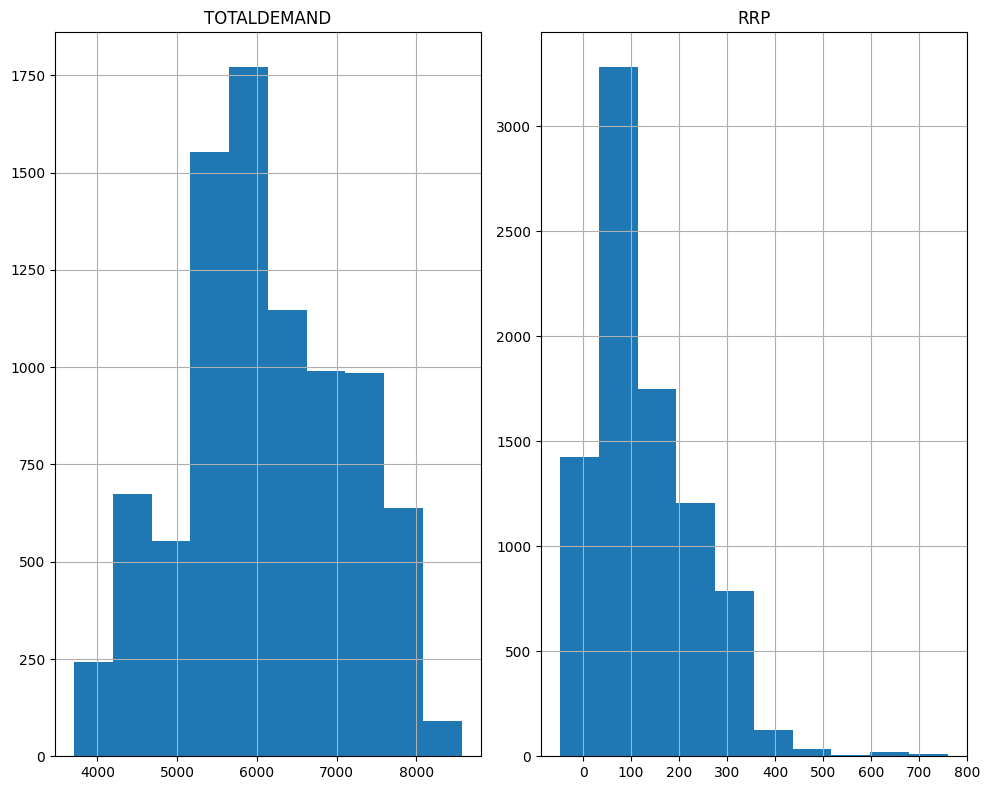

In [9]:
# Distribution of numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



cho 1 biến nào đso vẽ boxplot, đường phân phối nào trong khoảng nào đó, quartile 3,4, phát hiện được nhiều outlier, giữa mean, mép dưới màu xanh Q25, trên 75%

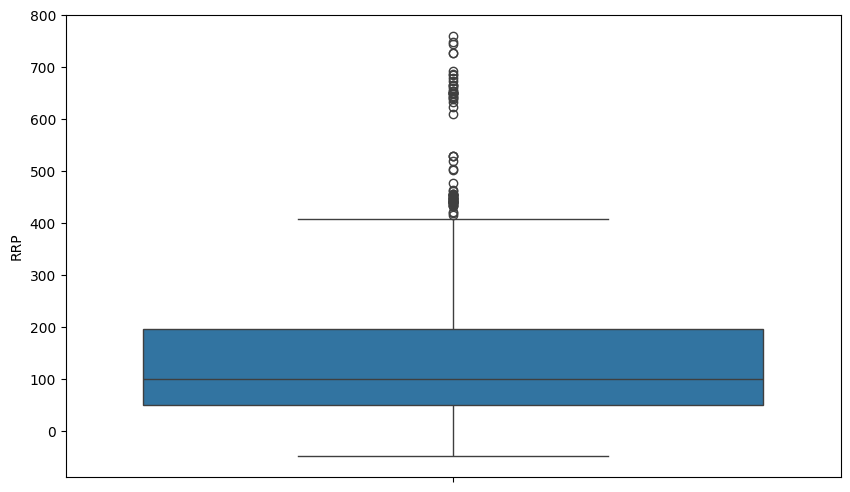

In [11]:
# Boxplot for numerical features
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.RRP)
plt.xticks(rotation=90)
plt.show()

boxplot cho demand, k có outlier

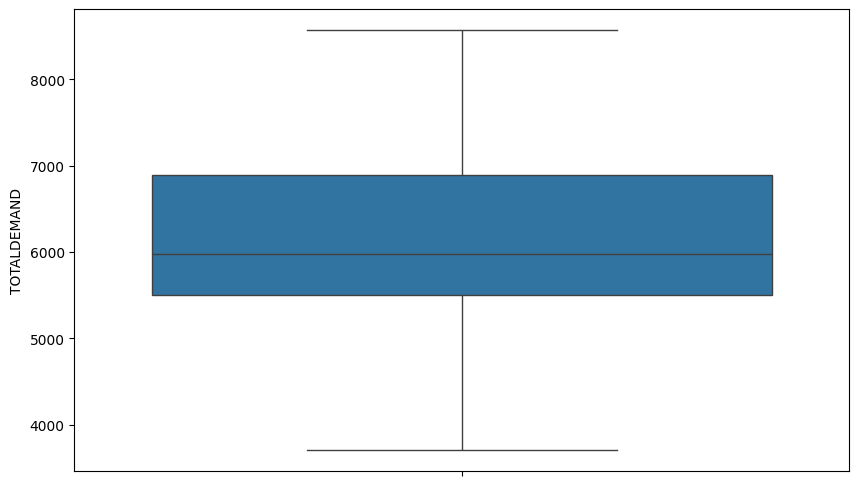

In [12]:
# Boxplot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.TOTALDEMAND)
plt.xticks(rotation=90)
plt.show()

demand và giá (correlation) => positively, demand tăng, giá tăng

In [14]:
# Compute the Pearson correlation coefficient between 'Variable1' and 'Variable2'
correlation = df.RRP.corr(df.TOTALDEMAND)
print(f"Pearson correlation coefficient between DEMAND and PRICE: {correlation:.2f}")


Pearson correlation coefficient between DEMAND and PRICE: 0.79


In [15]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['SETTLEMENTDATE'])
df.set_index('Date', inplace=True)

tính lợi nhuận, revenue, data số liệu 5 phút, tính mỗi 5p,
pct_change thay đổi theo giá, đặt tên là return, quan sát đúng đỉnh k có lợi nhuận
-  infinity: St/Sp, nếu S0 = 0: giá k ra, quên nan infinity
= check xem có bao nhiêu nan trong mô hình

In [18]:
# Compute 5 MINUTE returns
df['Return'] =df['RRP'].pct_change()
print(df)

                    REGION       SETTLEMENTDATE  TOTALDEMAND     RRP  \
Date                                                                   
2024-06-01 00:05:00   QLD1  2024/06/01 00:05:00      5904.09  173.01   
2024-06-01 00:10:00   QLD1  2024/06/01 00:10:00      5890.41  148.26   
2024-06-01 00:15:00   QLD1  2024/06/01 00:15:00      5886.49  155.77   
2024-06-01 00:20:00   QLD1  2024/06/01 00:20:00      5850.15  159.50   
2024-06-01 00:25:00   QLD1  2024/06/01 00:25:00      5820.65  173.00   
...                    ...                  ...          ...     ...   
2024-06-30 23:40:00   QLD1  2024/06/30 23:40:00      5644.67   59.75   
2024-06-30 23:45:00   QLD1  2024/06/30 23:45:00      5694.64   59.75   
2024-06-30 23:50:00   QLD1  2024/06/30 23:50:00      5683.24   59.95   
2024-06-30 23:55:00   QLD1  2024/06/30 23:55:00      5663.06   62.29   
2024-07-01 00:00:00   QLD1  2024/07/01 00:00:00      5593.42   62.73   

                    PERIODTYPE    Return  
Date                

k hiểu np, k gọi np ra, import library
-có 1 NaN: 1 số liệu là NaN

In [22]:
# Check for NaNs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
print("NaNs in data:", np.isnan(df['Return']).sum())

NaNs in data: 1


infs k, có chia 0 không

In [23]:
# Check for Infs
print("Infs in data:", np.isinf(df['Return']).sum())

Infs in data: 8


có thì bỏ

In [24]:
# Remove `inf` values
finite_data = df['Return'][np.isfinite(df['Return'])]

lợi nhuận là số 8631, có mean 0.3 (~30% mỗi 5p)

In [26]:
# Display summary statistics
print(finite_data.describe())

count    8631.000000
mean        0.306338
std        14.921419
min       -22.163757
25%        -0.064306
50%         0.000000
75%         0.051875
max      1039.000000
Name: Return, dtype: float64


vẽ histogram cho phần lợi nhuận mới, giả sử copy mean xuống, SD

mỗi 5p mới 20%

(array([4.24642052e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.49284105e-05, 4.24642052e-05, 1.69856821e-04, 1.69856821e-04,
        7.21891489e-04, 8.91748310e-04, 8.49284105e-04, 1.91088924e-03,
        2.54785231e-03, 3.60945744e-03, 5.47788247e-03, 7.34630750e-03,
        6.96412966e-03, 1.07009797e-02, 1.21447627e-02, 1.38857951e-02,
        1.70706105e-02, 2.03403543e-02, 2.18266015e-02, 2.35251697e-02,
        2.31005276e-02, 2.79839112e-02, 2.56908442e-02, 2.42470612e-02,
        2.58182368e-02, 2.42895254e-02, 2.21663151e-02, 2.00855691e-02,
        1.74527883e-02, 1.38008667e-02, 1.29091184e-02, 8.95994730e-03,
        7.89834217e-03, 4.50120575e-03, 4.41627734e-03, 3.48206483e-03,
        2.76017334e-03, 1.44378298e-03, 1.10406934e-03, 9.34212515e-04,
        3.82177847e-04, 4.24642052e-04, 1.27392616e-04, 8.49284105e-05,
        1.69856821e-04, 8.49284105e-05]),
 array([-61.82796707, -59.47304251, -57.11811794, -54.76319338,
        -52.40826881, -50.0533

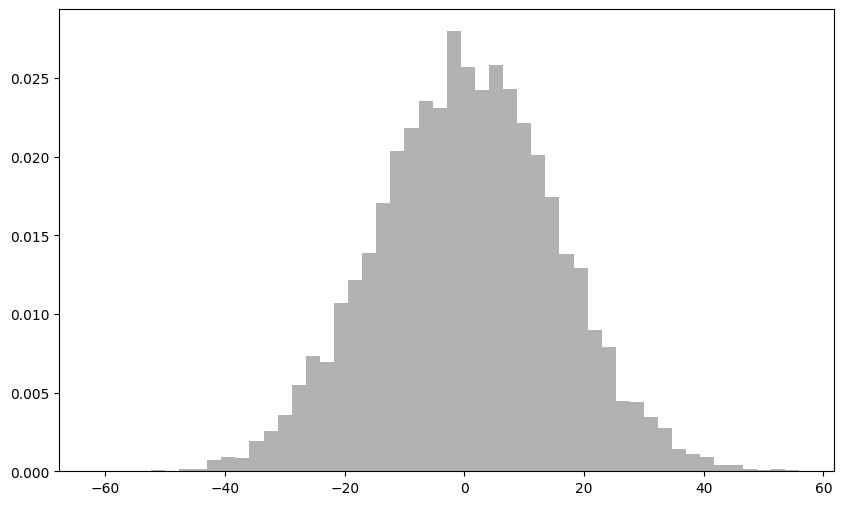

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define mean and standard deviation
mean = 0.3
std_dev = 15

# Generate sample data from the normal distribution
data = np.random.normal(mean, std_dev, 10000)

# Generate x values for the normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution
y = stats.norm.pdf(x, mean, std_dev)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='gray', label='Data Histogram')


+- 1 sigma để giá chính xác
-  đường màu đỏ mỗi bên 38% -> tròn vùng 2 màu đỏ, tần suốt xuất hiện 34% -> cộng lại 68%

- 95% cộng trừ 2 sigma
=> từ lợi nhuận rơi xuống mất 20%, rủi ro cũng lớn

có thể mất đi gần 30%, độ tin cậy 95% vẫn có thể xảy ra

rủi ro

đang dùng dữ kiện 5p, nếu dùng theo năm, số rớt lớn

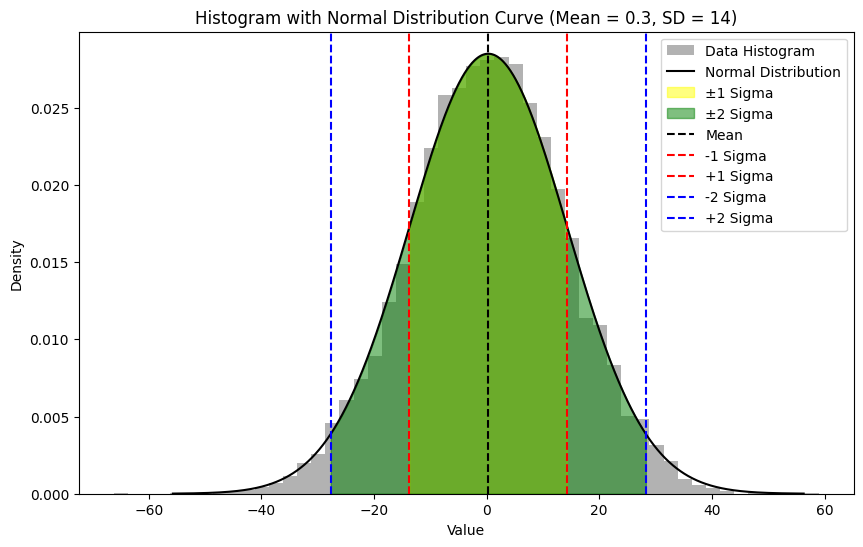

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define mean and standard deviation
mean = 0.3
std_dev = 14

# Generate sample data from the normal distribution
data = np.random.normal(mean, std_dev, 10000)

# Generate x values for the normal distribution curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution
y = stats.norm.pdf(x, mean, std_dev)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='gray', label='Data Histogram')

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution', color='black')

# Highlight the regions for -/+1 sigma and -/+2 sigmas
plt.fill_between(x, 0, y, where=(x > mean - std_dev) & (x < mean + std_dev), color='yellow', alpha=0.5, label='±1 Sigma')
plt.fill_between(x, 0, y, where=(x > mean - 2*std_dev) & (x < mean + 2*std_dev), color='green', alpha=0.5, label='±2 Sigma')

# Add vertical lines for mean, -/+1 sigma, and -/+2 sigmas
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean - std_dev, color='red', linestyle='--', label='-1 Sigma')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='+1 Sigma')
plt.axvline(mean - 2*std_dev, color='blue', linestyle='--', label='-2 Sigma')
plt.axvline(mean + 2*std_dev, color='blue', linestyle='--', label='+2 Sigma')

# Add titles and labels
plt.title('Histogram with Normal Distribution Curve (Mean = 0.3, SD = 14)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
